# 0.) Import the Credit Card Fraud Data From CCLE

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv("fraudTest.csv")

In [7]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [8]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

<ipython-input-8-d5842cbc8f12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
<ipython-input-8-d5842cbc8f12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [43]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [49]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [50]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

In [82]:
len(y_train)

389003

In [83]:
sum((y_train==1))

1540

# 3.) Train three logistic regression models

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [53]:
over_log.score(X_test, y_test)

0.9015811319849325

In [54]:
under_log.score(X_test, y_test)

0.8936394827131169

In [19]:
smote_log.score(X_test, y_test)

0.9276614122219823

In [ ]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

In [30]:
X_train

array([[-0.37134963, -0.29095457, -0.72332937, ..., -0.28505208,
        -0.31300121, -0.17970941],
       [ 0.09224723, -0.27420156, -1.41653455, ..., -0.28505208,
        -0.31300121, -0.17970941],
       [-0.40020655, -0.27795442,  1.18298487, ..., -0.28505208,
        -0.31300121, -0.17970941],
       ...,
       [ 0.10639278, -0.29160724,  1.00968357, ..., -0.28505208,
        -0.31300121, -0.17970941],
       [-0.07548757, -0.28670554,  1.18298487, ..., -0.28505208,
        -0.31300121, -0.17970941],
       [ 0.17278257, -0.29135083,  0.08541   , ..., -0.28505208,
        -0.31300121, -0.17970941]])

# 5.) Which performed best in Out of Sample metrics?

In [ ]:
# Sensitivity here in credit fraud is more important as seen from last class

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
y_true = y_test

In [22]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[77151,  5888],
       [   86,   233]])

In [23]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7304075235109718


In [24]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[77595,  5444],
       [   86,   233]])

In [25]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7304075235109718


In [26]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[77095,  5944],
       [   86,   233]])

In [27]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7304075235109718


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [59]:
df = pd.read_csv("fraudTest.csv")

df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)


<ipython-input-59-736286629fb1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
<ipython-input-59-736286629fb1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


In [60]:
raw_temp = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis =1)

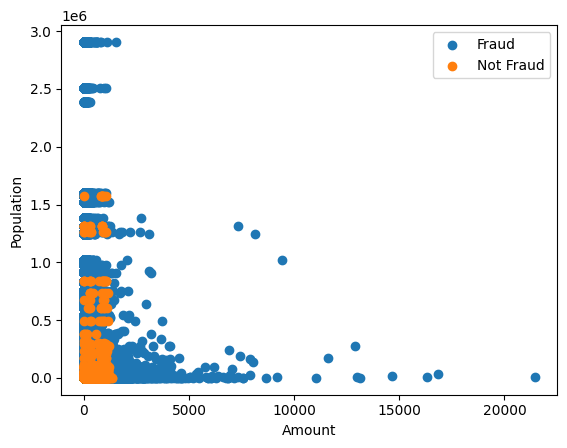

In [61]:
plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [88]:

raw_temp_2 = pd.concat([pd.DataFrame(smote_X), pd.DataFrame(smote_y)], axis =1)


In [89]:
df = pd.read_csv("fraudTest.csv")

df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)


<ipython-input-89-736286629fb1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
<ipython-input-89-736286629fb1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


In [90]:
# plt.scatter(raw_temp_2[raw_temp_2["is_fraud"] == 0]["amt"], raw_temp_2[raw_temp_2["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp_2[raw_temp_2["is_fraud"] == 1]["amt"], raw_temp_2[raw_temp_2["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

KeyError: 'amt'

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [142]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

  Using cached scikit_learn-1.4.0-1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)


In [144]:
import sklearn

In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [163]:
resampling_methods = {
    'over': RandomOverSampler(),
    'under': RandomUnderSampler(),
    'smote': SMOTE()
}

model_configs = {
    'LOG': LogisticRegression(),
    "LASSO": LogisticRegression(penalty="l1",C=.5, solver="liblinear" ),
    'DecisionTree': DecisionTreeClassifier()
}

In [164]:
def calc_perf_metrics(y_true,y_pred):
  tn,fp,fn,tp=confusion_matrix(y_true,y_pred).ravel()

  print(f"Precision :{tp/(tp+fp)}")
  print(f"Recall: {tp/(tp+fn)}")
  print(f"F1 Score : {2 * (tp / (tp + fp) * tp / (tp + fn)) / (tp / (tp + fp) + tp / (tp + fn))}")

In [165]:
trained_models = {}


In [166]:
for resample_key, resampler in resampling_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train,y_train)

    for model_name, model in model_configs.items():

        combined_key = f'{resample_key}_{model_name}'

        trained_models[combined_key] = model.fit(resample_X, resample_y)

        print(f"{combined_key}: ")

        y_pred=model.predict(X_test)
        calc_perf_metrics(y_test,y_pred)

over_LOG: 
Precision :0.015291277162137065
Recall: 0.7670807453416149
F1 Score : 0.029984825493171472
over_LASSO: 
Precision :0.02788483337111766
Recall: 0.7639751552795031
F1 Score : 0.053805774278215215
over_DecisionTree: 
Precision :0.5882352941176471
Recall: 0.5279503105590062
F1 Score : 0.5564648117839606
under_LOG: 
Precision :0.015161622900115228
Recall: 0.7763975155279503
F1 Score : 0.029742430551424663
under_LASSO: 
Precision :0.036815324753067945
Recall: 0.7639751552795031
F1 Score : 0.07024557395773844
under_DecisionTree: 
Precision :0.06653788366602276
Recall: 0.9627329192546584
F1 Score : 0.12447299739008233
smote_LOG: 
Precision :0.01576170869788986
Recall: 0.7608695652173914
F1 Score : 0.030883650573553505
smote_LASSO: 
Precision :0.13299944351697274
Recall: 0.7422360248447205
F1 Score : 0.22557810287871638
smote_DecisionTree: 
Precision :0.4947089947089947
Recall: 0.5807453416149069
F1 Score : 0.5342857142857144


In [167]:
trained_models

{'over_LOG': LogisticRegression(),
 'over_LASSO': LogisticRegression(C=0.5, penalty='l1', solver='liblinear'),
 'over_DecisionTree': DecisionTreeClassifier(),
 'under_LOG': LogisticRegression(),
 'under_LASSO': LogisticRegression(C=0.5, penalty='l1', solver='liblinear'),
 'under_DecisionTree': DecisionTreeClassifier(),
 'smote_LOG': LogisticRegression(),
 'smote_LASSO': LogisticRegression(C=0.5, penalty='l1', solver='liblinear'),
 'smote_DecisionTree': DecisionTreeClassifier()}

Decision Trees seem to outperform Logistic Regression and Lasso Regression in terms of F1 Score consistently across different sampling techniques. The F1 Score is a good indicator of balance between precision and recall, which is especially important in imbalanced datasets like fraud detection.
Oversampling with a Decision Tree (over_DecisionTree) achieves high precision and a reasonable recall, resulting in the highest F1 Score among the oversampling methods. This suggests that oversampling combined with a Decision Tree is effective for this particular dataset and problem.
Undersampling with a Decision Tree (under_DecisionTree) has a lower precision but very high recall, which is reflected in a moderate F1 Score. This could be useful in scenarios where missing a positive (fraudulent transaction) is costlier than false alarms.
SMOTE with Decision Tree (smote_DecisionTree) achieves a balance with moderate precision and recall, resulting in a good F1 Score, but it doesn't outperform the over_DecisionTree.
Best Model Selection:

The choice of the best model depends on the business context:

If the cost of false positives (flagging a legitimate transaction as fraudulent) is very high, you might prioritize precision, which would suggest using the over_DecisionTree.
If the cost of false negatives (missing a fraudulent transaction) is higher, you would prioritize recall, which would make under_DecisionTree a strong candidate.
If you are looking for a balance between precision and recall (generally a good practice if both types of errors are costly), you would look at the F1 Score, where over_DecisionTree seems to be the best.
Given the numbers, I would suggest over_DecisionTree as the best model due to its high precision and the highest F1 Score among the oversampling methods. It suggests that while it doesn't flag as many positives as the undersampling method, the ones it does flag are more likely to be true positives. This model seems to strike a good balance for a fraud detection scenario where both false positives and false negatives have significant costs.





